# ARIMA 모델

In [55]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [56]:
# ARIMA 모델을 활용한 시계열 데이터 예측

def parser(x):
  from datetime import datetime
  return datetime.strptime('199'+x, '%Y-%m')

series = pd.read_csv('/content/drive/MyDrive/딥러닝 파이토치 실습/7. 시계열 분석/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series.dropna()).reset_index()
series['Month'] = series['Month'].map(lambda x: parser(x))
series = series.set_index('Month').squeeze()

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Mon, 19 Dec 2022   AIC                            406.340
Time:                                                 05:39:56   BIC                            417.227
Sample:                                             02-01-1991   HQIC                           410.098
                                                  - 12-01-1993                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

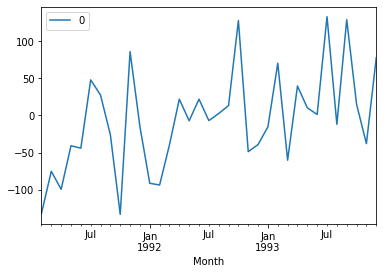

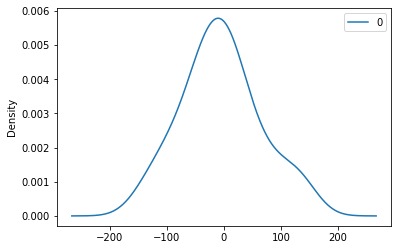

                0
count   35.000000
mean    -5.495202
std     68.132883
min   -133.296592
25%    -42.477905
50%     -7.186574
75%     24.748352
max    133.237978


In [57]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

predicted: [349.11766293], expected: 342.3
predicted: [306.51291378], expected: 339.7
predicted: [387.37645093], expected: 440.4
predicted: [348.15420565], expected: 315.9
predicted: [386.30876099], expected: 439.3
predicted: [356.08193992], expected: 401.3
predicted: [446.37948043], expected: 437.4
predicted: [394.73727041], expected: 575.5
predicted: [434.91542156], expected: 407.6
predicted: [507.92341742], expected: 682.0
predicted: [435.48296427], expected: 475.3
predicted: [652.74376119], expected: 581.3
predicted: [546.34356125], expected: 646.9
Test MSE: 6958.3251678747465


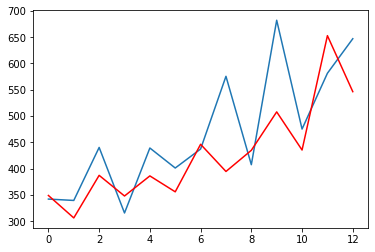

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error

X = series.values
X = np.nan_to_num(X)

size = int(len(X) * 0.66)

# train, test 분리
train, test = X[0 : size], X[size : len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):

  # 모델 선언 및 학습
  model = ARIMA(history, order=(5, 1, 0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()

  # 모델 예측 값 저장
  yhat = output[0]
  predictions.append(yhat)

  # 실제 값 저장
  obs = test[t]
  history.append(obs)

  print(f'predicted: {yhat}, expected: {obs}')

error = mean_squared_error(test, predictions)
print(f'Test MSE: {error}')

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 순환 신경망 (RNN)

## RNN 셀 구현

In [59]:
!pip install --user torchtext==0.8.1 torch==1.7.1 torchvision==0.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import torch, torchtext

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import time

In [61]:
# 데이터셋 전처리
start = time.time()

TEXT = torchtext.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL = torchtext.data.Field(sequential=False)

from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [62]:
print(vars(train_data.examples[0]))

{'text': ['i', 'consider', 'myself', 'a', 'huge', 'movie', 'buff.', 'i', 'was', 'sick', 'on', 'the', 'couch', 'and', 'popped', 'in', 'this', 'film.', 'right', 'from', 'the', 'opening', 'to', 'the', 'end', 'i', 'watched', 'in', 'awe', 'at', 'these', 'great', 'actors,', "i'd", 'never', 'seen,', 'say', 'great', 'word.', 'the', 'filming', 'was', 'beautiful.', 'it', 'was', 'just', 'what', 'i', 'needed.', 'i', 'hope', 'that', 'this', 'message', 'is', 'heard', 'over', 'any', 'bad', 'comments', 'written', 'by', 'others.', 'the', 'director', 'has', 'a', 'heart', 'and', 'it', 'beats', 'with', 'his', 'actors', 'throughout.', 'thanku', 'for', 'making', 'a', 'film', 'like', 'this', 'one.', 'just', 'wonderfully', 'awkward,', 'beautiful', 'kind', 'characters', 'who', 'are', 'flawed', 'and', 'graceful', 'all', 'at', 'once.', 'just', 'great.', 'i', "can't", 'submit', 'this', 'without', '10', 'lines', 'in', 'total', 'so', 'i', 'will', 'simply', 'go', 'on', 'to', 'say', 'that', 'i', 'wish', 'for', 'more'

In [63]:
# 데이터셋 전처리
import string

for example in train_data.examples:
  text = [i.lower() for i in vars(example)['text']] # 소문자로 변경
  text = [i.replace('<br', '') for i in text] # '<br'을 공백으로 변경
  text = [''.join(j for j in i if j not in string.punctuation) for i in text] # 구두점 제거
  text = [i for i in text if i] # 공백 제거
  vars(example)['text'] = text

print(vars(train_data.examples[0]))

{'text': ['i', 'consider', 'myself', 'a', 'huge', 'movie', 'buff', 'i', 'was', 'sick', 'on', 'the', 'couch', 'and', 'popped', 'in', 'this', 'film', 'right', 'from', 'the', 'opening', 'to', 'the', 'end', 'i', 'watched', 'in', 'awe', 'at', 'these', 'great', 'actors', 'id', 'never', 'seen', 'say', 'great', 'word', 'the', 'filming', 'was', 'beautiful', 'it', 'was', 'just', 'what', 'i', 'needed', 'i', 'hope', 'that', 'this', 'message', 'is', 'heard', 'over', 'any', 'bad', 'comments', 'written', 'by', 'others', 'the', 'director', 'has', 'a', 'heart', 'and', 'it', 'beats', 'with', 'his', 'actors', 'throughout', 'thanku', 'for', 'making', 'a', 'film', 'like', 'this', 'one', 'just', 'wonderfully', 'awkward', 'beautiful', 'kind', 'characters', 'who', 'are', 'flawed', 'and', 'graceful', 'all', 'at', 'once', 'just', 'great', 'i', 'cant', 'submit', 'this', 'without', '10', 'lines', 'in', 'total', 'so', 'i', 'will', 'simply', 'go', 'on', 'to', 'say', 'that', 'i', 'wish', 'for', 'more', 'from', 'this

In [64]:
# 훈련 및 검증 데이터 분리
import random

train_data, valid_data = train_data.split(random_state=random.seed(0), split_ratio=0.8)

print(f'train_data length: {len(train_data)}')
print(f'valid_data length: {len(valid_data)}')
print(f'test_data length: {len(test_data)}')

train_data length: 20000
valid_data length: 5000
test_data length: 25000


In [65]:
# 단어집합 생성
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f'Unique tokens in TEXT vocab: {len(TEXT.vocab)}')
print(f'Unique tokens in LABEL vocab: {len(LABEL.vocab)}')

Unique tokens in TEXT vocab: 10002
Unique tokens in LABEL vocab: 3


In [66]:
# LABEL ==> 긍정, 부정, <unk>
LABEL.vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f778f5df3d0>>,
            {'<unk>': 0, 'pos': 1, 'neg': 2})

In [67]:
# 데이터셋 메모리로 가져오기
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100 # 각 단어를 100차원으로 조정 (임베딩 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300 # 은닉층의 유닛 개수

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device
)

In [68]:
# 워드 임베딩 및 RNN 셀 정의
class RNNCell_Encoder(nn.Module):
  def __init__(self, input_dim, hidden_size):
    super(RNNCell_Encoder, self).__init__()
    self.rnn = nn.RNNCell(input_dim, hidden_size)

  # inputs => 입력 시퀀스 (시퀀스 길이, 배치, 임베딩)
  def forward(self, inputs):
    bz = inputs.shape[1] # batch
    ht = torch.zeros((bz, hidden_size)).to(device) # 배치, 은닉층 뉴런의 크기를 0으로 초기화
    for word in inputs:
      ht = self.rnn(word, ht) # 재귀적으로 발생하는 상태 값 처리

    return ht

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) # 임베딩 처리 (임베딩 할 단어 수 또는 단어 집합의 크기, 임베딩할 벡터의 차원)
    self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
    self.fc1 = nn.Linear(hidden_size, 256)
    self.fc2 = nn.Linear(256, 3)

  def forward(self, x):
    x = self.em(x)
    x = self.rnn(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [69]:
model = Net() # model 객체화
model.to(device)

loss_fn = nn.CrossEntropyLoss() # 다중분류에 사용되는 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [70]:
# 모델 학습위한 함수 정의
# 1. 데이터로더에서 데이터 가져온 후 모델에 적용
# 2. 손실함수 적용하여 오차 도출
# 3. 옵티마이저를 이용하여 가중치, 편향 등을 업데이트

def training(epoch, model, trainloader, validloader):
  correct = 0; total = 0; running_loss = 0

  model.train()

  # 훈련 데이터 학습
  for b in trainloader:
    x, y = b.text, b.label # trainloader 의 text, label 가져옴
    x, y = x.to(device), y.to(device) # 모델과 같은 장치를 사용할 수 있도록 device 지정 필요

    y_pred = model(x)
    loss = loss_fn(y_pred, y) # CrossEntropyLoss 손실 함수를 이용하여 오차 계산

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      y_pred = torch.argmax(y_pred, dim=1)
      correct += (y_pred == y).sum().item()
      total += y.size(0)
      running_loss += loss.item()

  epoch_loss = running_loss / len(trainloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_acc = correct / total

  # 검증 데이터 학습
  valid_correct = 0; valid_total = 0; valid_running_loss = 0

  model.eval()
  with torch.no_grad():
    for b in validloader:
      x, y = b.text, b.label
      x, y = x.to(device), y.to(device)

      y_pred = model(x)
      loss = loss_fn(y_pred, y)

      y_pred = torch.argmax(y_pred, dim=1)

      valid_correct += (y_pred == y).sum().item()
      valid_total += y.size(0)
      valid_running_loss += loss.item()

  epoch_valid_loss = valid_running_loss / len(validloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_valid_acc = valid_correct / valid_total

  print(
        f'epoch: {epoch}, loss: {round(epoch_loss, 3)}, acc: {round(epoch_acc, 3)}, valid_loss: {round(epoch_valid_loss, 3)}, valid_acc: {round(epoch_valid_acc, 3)}'
      )

  return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [71]:
# 모델 학습
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

epochs = 10
train_loss = []; train_acc = []; valid_loss = []; valid_acc = []

start = time.time()

for epoch in tqdm(range(epochs)):
  epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model, train_iterator, valid_iterator)

  train_loss.append(epoch_loss)
  train_acc.append(epoch_acc)

  valid_loss.append(epoch_valid_loss)
  valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)

 10%|█         | 1/10 [00:28<04:14, 28.27s/it]

epoch: 0, loss: 0.011, acc: 0.486, valid_loss: 0.011, valid_acc: 0.513


 20%|██        | 2/10 [00:50<03:19, 24.98s/it]

epoch: 1, loss: 0.011, acc: 0.503, valid_loss: 0.011, valid_acc: 0.492


 30%|███       | 3/10 [01:12<02:44, 23.44s/it]

epoch: 2, loss: 0.011, acc: 0.51, valid_loss: 0.011, valid_acc: 0.494


 40%|████      | 4/10 [01:35<02:19, 23.23s/it]

epoch: 3, loss: 0.011, acc: 0.515, valid_loss: 0.011, valid_acc: 0.494


 50%|█████     | 5/10 [02:05<02:07, 25.51s/it]

epoch: 4, loss: 0.011, acc: 0.522, valid_loss: 0.011, valid_acc: 0.513


 60%|██████    | 6/10 [02:26<01:36, 24.19s/it]

epoch: 5, loss: 0.011, acc: 0.529, valid_loss: 0.011, valid_acc: 0.5


 70%|███████   | 7/10 [02:48<01:09, 23.28s/it]

epoch: 6, loss: 0.011, acc: 0.535, valid_loss: 0.011, valid_acc: 0.516


 80%|████████  | 8/10 [03:09<00:45, 22.66s/it]

epoch: 7, loss: 0.011, acc: 0.544, valid_loss: 0.011, valid_acc: 0.496


 90%|█████████ | 9/10 [03:31<00:22, 22.61s/it]

epoch: 8, loss: 0.011, acc: 0.552, valid_loss: 0.011, valid_acc: 0.511


100%|██████████| 10/10 [03:53<00:00, 23.32s/it]

epoch: 9, loss: 0.01, acc: 0.554, valid_loss: 0.011, valid_acc: 0.511
233.16253089904785


In [72]:
# 모델 예측 함수 정의
def evaluate(epoch, model, testloader):
  test_correct = 0; test_total = 0; test_running_loss = 0

  model.eval()

  # 훈련 데이터 학습
  with torch.no_grad():
    for b in testloader:
      x, y = b.text, b.label # trainloader 의 text, label 가져옴
      x, y = x.to(device), y.to(device) # 모델과 같은 장치를 사용할 수 있도록 device 지정 필요

      y_pred = model(x)
      loss = loss_fn(y_pred, y) # CrossEntropyLoss 손실 함수를 이용하여 오차 계산

      y_pred = torch.argmax(y_pred, dim=1)

      test_correct += (y_pred == y).sum().item()
      test_total += y.size(0)
      test_running_loss += loss.item()

  epoch_test_loss = test_running_loss / len(testloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_test_acc = test_correct / test_total

  print(
        f'epoch: {epoch}, test_loss: {round(epoch_test_loss, 3)}, test_acc: {round(epoch_test_acc, 3)}'
      )
  
  return epoch_test_loss, epoch_test_acc

In [73]:
epochs = 10
test_loss = []; test_acc = []

start = time.time()

for epoch in tqdm(range(epochs)):
  epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)

  test_loss.append(epoch_test_loss)
  test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

 10%|█         | 1/10 [00:10<01:36, 10.75s/it]

epoch: 0, test_loss: 0.011, test_acc: 0.503


 20%|██        | 2/10 [00:19<01:16,  9.59s/it]

epoch: 1, test_loss: 0.011, test_acc: 0.503


 30%|███       | 3/10 [00:28<01:04,  9.20s/it]

epoch: 2, test_loss: 0.011, test_acc: 0.503


 40%|████      | 4/10 [00:36<00:54,  9.01s/it]

epoch: 3, test_loss: 0.011, test_acc: 0.503


 50%|█████     | 5/10 [00:45<00:44,  8.99s/it]

epoch: 4, test_loss: 0.011, test_acc: 0.503


 60%|██████    | 6/10 [00:54<00:35,  8.88s/it]

epoch: 5, test_loss: 0.011, test_acc: 0.503


 70%|███████   | 7/10 [01:03<00:26,  8.83s/it]

epoch: 6, test_loss: 0.011, test_acc: 0.503


 80%|████████  | 8/10 [01:12<00:17,  8.81s/it]

epoch: 7, test_loss: 0.011, test_acc: 0.503


 90%|█████████ | 9/10 [01:20<00:08,  8.77s/it]

epoch: 8, test_loss: 0.011, test_acc: 0.503


100%|██████████| 10/10 [01:29<00:00,  8.96s/it]

epoch: 9, test_loss: 0.011, test_acc: 0.503
89.56684875488281


## RNN 계층 구현

In [74]:
import torch, torchtext
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import time

In [75]:
start = time.time()

TEXT = torchtext.data.Field(sequential=True, batch_first=True, lower=True)
LABEL = torchtext.data.Field(sequential=False, batch_first=True)

from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(split_ratio=0.8)

TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

BATCH_SIZE = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [76]:
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device
)

In [77]:
vocab_size = len(TEXT.vocab)
n_classes = 2 # pos, neg

In [78]:
# RNN 계층 네트워크
class BasicRNN(nn.Module):
  def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
    super(BasicRNN, self).__init__()

    self.n_layers = n_layers # RNN 계층에 대한 개수
    self.embed = nn.Embedding(n_vocab, embed_dim) # 워드 임베딩 적용
    self.hidden_dim = hidden_dim
    self.dropout = nn.Dropout(dropout_p)
    self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True)
    self.out = nn.Linear(self.hidden_dim, n_classes)

  def _init_state(self, batch_size=1):
    weight = next(self.parameters()).data # 모델의 파라미터 값 가져온 후, weight 변수에 저장
    return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_() # 크기가 (계층 개수, 배치 크기, 은닉층의 뉴런 개수)인 은닉 상태(텐서)를 생성하여 0으로 초기화 후 반환

  def forward(self, x):
    x = self.embed(x) # 문자를 숫자 및 벡터로 변환
    h_0 = self._init_state(batch_size=x.size(0)) # 최초 은닉 상태의 값을 0으로 초기화
    x, _ = self.rnn(x, h_0) # RNN 계층, 파라미터로 입력과 이전 은닉 상태의 값 받음
    h_t = x[:, -1, :] # 모든 네트워크를 거쳐 가장 마지막에 나온 단어의 임베딩 값 (마지막 은닉 상태의 값)
    self.dropout(h_t)
    logit = torch.sigmoid(self.out(h_t))

    return logit

In [79]:
# 모델 선언 및 손실함수, 옵티마이저 설정
model = BasicRNN(n_layers=1, hidden_dim=256, n_vocab=vocab_size, embed_dim=128, n_classes=n_classes, dropout_p=0.5)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [80]:
# 모델 학습
def train(model, optimizer, train_iter):
  model.train()
  for b, batch in enumerate(train_iter):
    x, y = batch.text.to(device), batch.label.to(device)
    y.data.sub_(1) # 레이블 값 0, 1이므로 이에 따라 변환

    optimizer.zero_grad()

    logit = model(x)
    loss = F.cross_entropy(logit, y)
    loss.backward()
    
    optimizer.step()

    if b % 50 == 0:
      print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(e, b * len(x), len(train_iter.dataset), 100. * b / len(train_iter), loss.item()))

In [81]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0

    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) 
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction = "sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    
    return avg_loss, avg_accuracy

In [82]:
# 모델 학습 및 평가
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5

for e in range(1, EPOCHS + 1):
  train(model, optimizer, train_iterator)
  val_loss, val_accuracy = evaluate(model, valid_iterator)
  print('[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f'% (e, val_loss, val_accuracy))

Train Epoch: 1 [0/20000 (0%)]	Loss: 0.682796
Train Epoch: 1 [5000/20000 (25%)]	Loss: 0.693295
Train Epoch: 1 [10000/20000 (50%)]	Loss: 0.692689
Train Epoch: 1 [15000/20000 (75%)]	Loss: 0.699843
[EPOCH: 1], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 2 [0/20000 (0%)]	Loss: 0.693898
Train Epoch: 2 [5000/20000 (25%)]	Loss: 0.694140
Train Epoch: 2 [10000/20000 (50%)]	Loss: 0.692868
Train Epoch: 2 [15000/20000 (75%)]	Loss: 0.697429
[EPOCH: 2], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 3 [0/20000 (0%)]	Loss: 0.695637
Train Epoch: 3 [5000/20000 (25%)]	Loss: 0.694158
Train Epoch: 3 [10000/20000 (50%)]	Loss: 0.694706
Train Epoch: 3 [15000/20000 (75%)]	Loss: 0.691670
[EPOCH: 3], Validation Loss:  0.69 | Validation Accuracy:  0.51
Train Epoch: 4 [0/20000 (0%)]	Loss: 0.689151
Train Epoch: 4 [5000/20000 (25%)]	Loss: 0.694202
Train Epoch: 4 [10000/20000 (50%)]	Loss: 0.693918
Train Epoch: 4 [15000/20000 (75%)]	Loss: 0.694006
[EPOCH: 4], Validation Loss:  0.

In [83]:
test_loss, test_acc = evaluate(model, test_iterator)
print(f'Test Loss: {test_loss} | Test Accuracy: {test_acc}')

Test Loss: 0.6899612469482422 | Test Accuracy: 0.5321199893951416


# LSTM

## LSTM 셀 구현

In [84]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torchvision.datasets as dataset

from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor

import torch.nn.functional as F
from torch.utils.data import DataLoader

import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor # gpu 사용에 필요

torch.manual_seed(125)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(125)

In [85]:
mnist_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (1.0, )) # 평균을 0.5, 표준편차를 1.0으로 데이터 정규화 => 데이터 분포 조정
    ]
)

In [86]:
from torchvision.datasets import MNIST

download_root = '/content/drive/MyDrive/딥러닝 파이토치 실습/7. 시계열 분석/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [87]:
# 데이터셋 메모리로 가져오기
batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [88]:
# 배치 크기 및 에폭 크기 선정
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

num_epochs

10

In [89]:
# LSTM 셀 네트워크 구축
class LSTMCell(nn.Module):
  def __init__(self, input_size, hidden_size, bias=True):
    super(LSTMCell, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.bias = bias

    self.x2h = nn.Linear(input_size, 4*hidden_size, bias=bias)
    self.h2h = nn.Linear(hidden_size, 4*hidden_size, bias=bias)
    
    self.reset_parameters()

  def reset_parameters(self):
    std = 1.0 / math.sqrt(self.hidden_size)
    for w in self.parameters():
      w.data.uniform_(-std, std)

  def forward(self, x, hidden):
    hx, cx = hidden
    x = x.view(-1, x.size(1))

    gates = self.x2h(x) + self.h2h(hx)
    gates = gates.squeeze()
    ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)

    ingate = F.sigmoid(ingate)
    forgetgate = F.sigmoid(forgetgate)
    cellgate = F.tanh(cellgate)
    outgate = F.sigmoid(outgate)

    cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate)
    hy = torch.mul(outgate, F.tanh(cy))

    return (hy, cy)

In [90]:
# LSTM 네트워크 구성
class LSTMModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
    super(LSTMModel, self).__init__()
    self.hidden_dim = hidden_dim

    self.layer_dim = layer_dim
    self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    if torch.cuda.is_available():
      h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())

    else:
      h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

    if torch.cuda.is_available():
      c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())

    else:
      c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

    outs = []
    cn = c0[0, :, :]
    hn = h0[0, :, :]

    for seq in range(x.size(1)):
      hn, cn = self.lstm(x[:, seq, :], (hn, cn))
      outs.append(hn)

    out = outs[-1].squeeze()
    out = self.fc(out)

    return out

In [91]:
# 옵티마이저 & 손실함수 지정
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
  model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [92]:
# 모델 학습 및 성능 확인
seq_dim = 28
loss_list = []
iter = 0

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    if torch.cuda.is_available():
      images = Variable(images.view(-1, seq_dim, input_dim).cuda())
      labels = Variable(labels.cuda())

    else:
      images = Variable(images.view(-1, seq_dim, input_dim))
      labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    if torch.cuda.is_available():
      loss.cuda()

    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    iter += 1

    if iter % 500 == 0:
      correct = 0
      total = 0

      for images, labels in valid_loader:
        if torch.cuda.is_available():
          images = Variable(images.view(-1, seq_dim, input_dim).cuda())

        else:
          images = Variable(images.view(-1, seq_dim, input_dim))

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()

        else:
          correct += (predicted == labels).sum()

      accuracy = 100 * correct / total
      print(f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 2.248181104660034, Accuracy: 23.75
Iteration: 1000, Loss: 0.7714380621910095, Accuracy: 74.04000091552734
Iteration: 1500, Loss: 0.38856828212738037, Accuracy: 86.87000274658203
Iteration: 2000, Loss: 0.03982939571142197, Accuracy: 93.2699966430664
Iteration: 2500, Loss: 0.25260862708091736, Accuracy: 94.9000015258789
Iteration: 3000, Loss: 0.15311142802238464, Accuracy: 95.38999938964844
Iteration: 3500, Loss: 0.0701848641037941, Accuracy: 96.5
Iteration: 4000, Loss: 0.1728394329547882, Accuracy: 95.87000274658203
Iteration: 4500, Loss: 0.09569989144802094, Accuracy: 97.26000213623047
Iteration: 5000, Loss: 0.07848440855741501, Accuracy: 97.29000091552734
Iteration: 5500, Loss: 0.04066978022456169, Accuracy: 97.38999938964844
Iteration: 6000, Loss: 0.08360175788402557, Accuracy: 97.81999969482422
Iteration: 6500, Loss: 0.08220946788787842, Accuracy: 97.0999984741211
Iteration: 7000, Loss: 0.06329803913831711, Accuracy: 97.44000244140625
Iteration: 7500, Loss: 0.0

In [93]:
# 예측 성능 확인
def evaluate(model, val_iter):
  corrects, total, total_loss = 0, 0, 0
  model.eval()

  for images, labels in val_iter:
    if torch.cuda.is_available():
      images = Variable(images.view(-1, seq_dim, input_dim).cuda())
    
    else:
      images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)

    labels = labels.cuda()
    logit = model(images).cuda()
    loss = F.cross_entropy(logit, labels, reduction='sum')

    _, predicted = torch.max(logit.data, 1)

    total += labels.size(0)
    total_loss += loss.item()
    corrects += (predicted == labels).sum()

  avg_loss = total_loss / len(val_iter.dataset)
  avg_accuracy = corrects / total

  return avg_loss, avg_accuracy

In [94]:
test_loss, test_acc = evaluate(model, test_loader)
print(f'Test Loss: {test_loss}, Test Acc: {test_acc}')

Test Loss: 0.10327882894128561, Test Acc: 0.9702000021934509


## LSTM 계층 구현

In [95]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [96]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap07/data/SUBX.csv 데이터 불러오기
data=pd.read_csv('SBUX.csv')
print(data.dtypes)

Saving SBUX.csv to SBUX (1).csv
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [97]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

In [98]:
X = data.iloc[:, :-1] # 독립변수
y = data.iloc[:, 5:6] # 종속변수

print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [99]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [100]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [101]:
class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM, self).__init__()
    self.num_classes = num_classes # 클래스 개수
    self.num_layers = num_layers # LSTM 계층의 개수
    self.input_size = input_size # 입력 크기로 훈련 데이터셋의 컬럼 개수 의미
    self.hidden_size = hidden_size # 은닉층의 뉴런 개수
    self.seq_length = seq_length # 시퀀스 길이

    # LSTM, 완전연결층, 출력층 정의
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.fc_1 = nn.Linear(hidden_size, 128)
    self.fc = nn.Linear(128, num_classes)

    self.relu = nn.ReLU()

  def forward(self, x):

    # 은닉 및 셀 상태 0으로 초기화
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

    # LSTM 계층에 은닉 및 셀 상태 적용
    output, (hn, cn) = self.lstm(x, (h_0, c_0))

    # 완전연결층 적용위한 데이터 형태 1차원으로 조정
    hn = hn.view(-1, self.hidden_size)

    out = self.relu(hn)
    out = self.fc_1(out)
    out = self.relu(out)
    out = self.fc(out)

    return out

In [102]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5  # 입력 데이터셋의 컬럼 수
hidden_size = 2  # 은닉층의 뉴런 / 유닛 개수
num_layers = 1  # LSTM 계층의 개수

num_classes = 1 
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [103]:
# 모델 학습
for epoch in range(num_epochs):
  outputs = model.forward(X_train_tensors_f) # 전방향 학습

  optimizer.zero_grad()
  loss = criterion(outputs, y_train_tensors)
  loss.backward() # 기울기 계산

  optimizer.step() # 오차 업데이트

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.11772674322128296
Epoch: 100, Loss: 0.0461193323135376
Epoch: 200, Loss: 0.03949880227446556
Epoch: 300, Loss: 0.037072911858558655
Epoch: 400, Loss: 0.034921105951070786
Epoch: 500, Loss: 0.033416617661714554
Epoch: 600, Loss: 0.03277543932199478
Epoch: 700, Loss: 0.03242914378643036
Epoch: 800, Loss: 0.03211343660950661
Epoch: 900, Loss: 0.03171149268746376


In [104]:
# 모델 예측 결과 출력 위한 데이터 크기 재구성
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

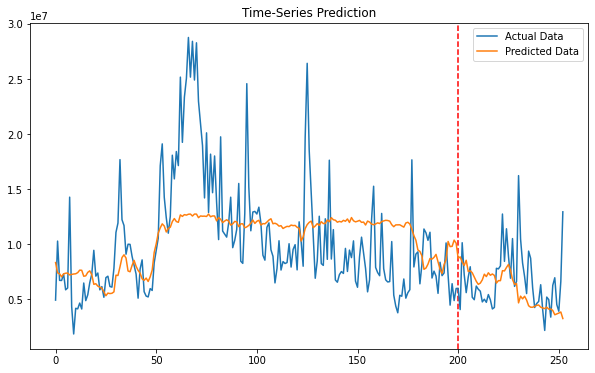

In [105]:
train_predict = model(df_x_ss) # 훈련 데이터셋을 모델에 적용하여 모델 학습
predicted = train_predict.data.numpy() # 모델 학습 결과를 numpy로 변경
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) # 모델 학습 위한 전처리 (정규화) 해제, 그래프의 본래 값 출력 위함
label_y = ms.inverse_transform(label_y)

plt.figure(figsize=(10, 6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# GRU

In [108]:
class GRU(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(GRU, self).__init__()
    self.num_classes = num_classes 
    self.num_layers = num_layers 
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.seq_length = seq_length 

    self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.fc_1 = nn.Linear(hidden_size, 128)
    self.fc = nn.Linear(128, num_classes)
    self.relu = nn.ReLU()

  def forward(self, x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
    output, (hn) = self.gru(x, (h_0))
    hn = hn.view(-1, self.hidden_size)

    out = self.relu(hn)
    out = self.fc_1(out) 
    out = self.relu(out) 
    out = self.fc(out)
    
    return out

In [109]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [110]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors)
    loss.backward() 
 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.04433
Epoch: 100, loss: 0.03533
Epoch: 200, loss: 0.02868
Epoch: 300, loss: 0.02296
Epoch: 400, loss: 0.02008
Epoch: 500, loss: 0.01927
Epoch: 600, loss: 0.01901
Epoch: 700, loss: 0.01886
Epoch: 800, loss: 0.01873
Epoch: 900, loss: 0.01863


In [111]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

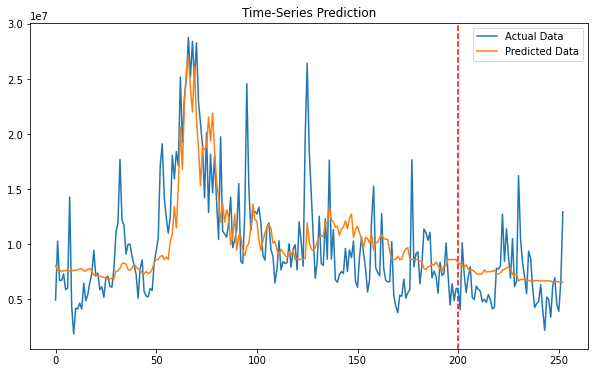

In [112]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# 양방향 LSTM

In [114]:
class biLSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(biLSTM, self).__init__()
    self.num_classes = num_classes 
    self.num_layers = num_layers 
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.seq_length = seq_length 

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True) 
    self.fc =  nn.Linear(hidden_size*2, num_classes) 
    self.relu = nn.ReLU()

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)) 
    c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))

    out, _ = self.lstm(x, (h_0, c_0)) 
    out = self.fc(out[:, -1, :])               
    out = self.relu(out)
    
    return out

In [115]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [117]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad() 
 
    loss = criterion(outputs, y_train_tensors) 
    loss.backward()  
    optimizer.step() 
    
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.03110
Epoch: 100, loss: 0.02957
Epoch: 200, loss: 0.02832
Epoch: 300, loss: 0.02729
Epoch: 400, loss: 0.02644
Epoch: 500, loss: 0.02573
Epoch: 600, loss: 0.02511
Epoch: 700, loss: 0.02456
Epoch: 800, loss: 0.02407
Epoch: 900, loss: 0.02361


In [118]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

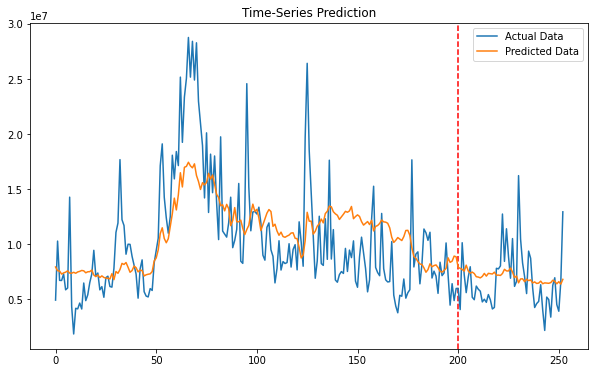

In [119]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show()